# Birthday paradox

**Problem 1a.** During exercise session, we showed that for $d$ equally likely dates in a year and $n$ people, the probability of a repeat date is $p(n)=1-\frac{d^\underline{n}}{d^n}$. We also derived a simple approximate formula for this probability: $p_a(n) = 1-e^{-\frac{n(n-1)}{2d}}$. In particular, this approximation implies that for $d=365$ dates, $p(n)$ is close to $\frac{1}{2}$ for $n=23$.

Verify how good the approximation is. To this end, write a program that computes the exact value of $p(n)$ as well as the value of the approximation $p_a(n)$ for $d=365$ and $n=1,\ldots,60$. Plot the graphs of the two functions.

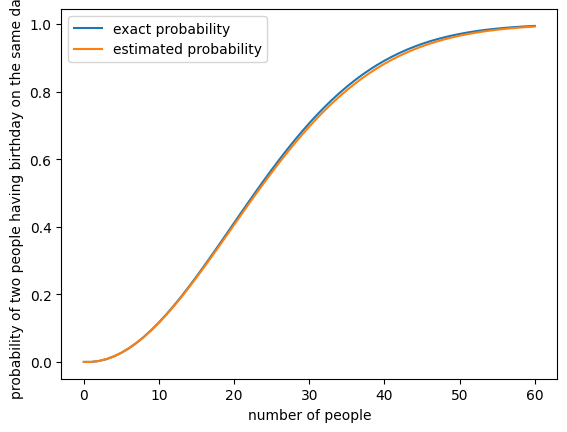

In [23]:
import numpy as np
import matplotlib.pyplot as plt

d = 365
n_max = 61

def p(n):
    arr = [(1 - k / d) for k in range(n)]
    return 1 - np.prod(arr)

def p_a(n):
    return 1 - np.exp((-1) * n * (n - 1) / (2 * d))

def result_list(f):
    return [f(n) for n in range(n_max)]

p_list = result_list(p)
p_a_list = result_list(p_a)

plt.plot(p_list, label="exact probability")
plt.plot(p_a_list, label="estimated probability")
plt.xlabel("number of people")
plt.ylabel("probability of two people having birthday on the same day")
plt.legend()
plt.show()

**Problem 1b.**
Implement a function, that chooses random dates out of $1,\ldots,d$ until a repeat occurs. The function should return the number of the step in which that happened. Run the function $N=100\,000$ times. 
    * Plot a histogram of the return values.
    * Which return value seems most likely? 
    * What is the average of the return values?
    * Is there any simple relation between these two numbers and the value $23$ in the previous problem?
    * Is there any simple relation between the histogram obtained, and the plot in the previous problem?

Text(0, 0.5, 'number of repetitions')

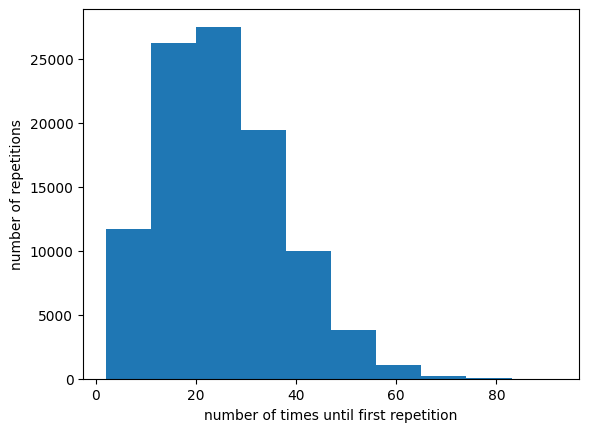

In [34]:
N = 100001

def times_until_repetition():
    s = set()
    iterations = 0
    while True:
        iterations += 1
        x = np.random.randint(d)
        if x not in s:
            s.add(x)
        else:
            return iterations

results = [times_until_repetition() for n in range(N)]

plt.hist(results)
plt.xlabel("number of times until first repetition")
plt.ylabel("number of repetitions")

Conclusion: it appears that numbers close to $23$ are most likely to appear, as expected from the previous task. 

**Problem 1c.** Here we investigate how our analysis using the classical approach compares to a more empirical one. The file *us_births_69_88.csv* contains the counts for birthdates from 1969 to 1988. Only those births, for which the full date is known, are included in the file.
    * Read the file.
    * Investigate the data. Do you notice anything strange?
    * Plot a heatmap of the data. Do you notice any significant deviations from the uniform assumption? Can you explain them?
    * Implement a sampling function as in 1b, but this time using the supplied data. Compare the results.

Text(0, 0.5, 'day in month')

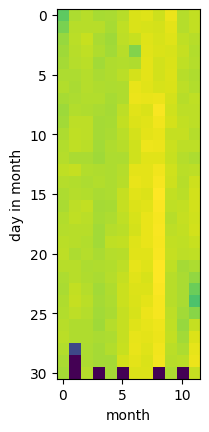

In [49]:
import pandas as pd

df = pd.read_csv('us_births_69_88.csv')

df1 = df.pivot(index='day', columns='month', values='births')

plt.imshow(df1)
plt.xlabel("month")
plt.ylabel("day in month")
